# Άσκηση 6, Τμηματοποίηση 2:
Θεωρήστε την έγχρωμη εικόνα ‘book-cover.jpeg’.

**Ζητούμενα:**
Α. Αφού μετατρέψετε την εικόνα σε εικόνα αποχρώσεων του γκρι, σχεδιάστε, περιγράψτε
και εφαρμόστε αλγόριθμο τμηματοποίησης για την ανίχνευση των γραμμάτων-
χαρακτήρων που υπάρχουν στην εικόνα.
Β. Τυπώστε μια δυαδική μάσκα τμηματοποίησης, όπου το προσκήνιο (foreground)
αντιστοιχεί στα εικονοστοιχεία της εικόνας που αντιστοιχούν στους χαρακτήρες που
έχουν ανιχνευθεί και το παρασκήνιο (background) σε όλα τα υπόλοιπα. Σχολιάστε το
αποτέλεσμα.

In [1]:
%pip install matplotlib numpy scikit-image --quiet

Note: you may need to restart the kernel to use updated packages.


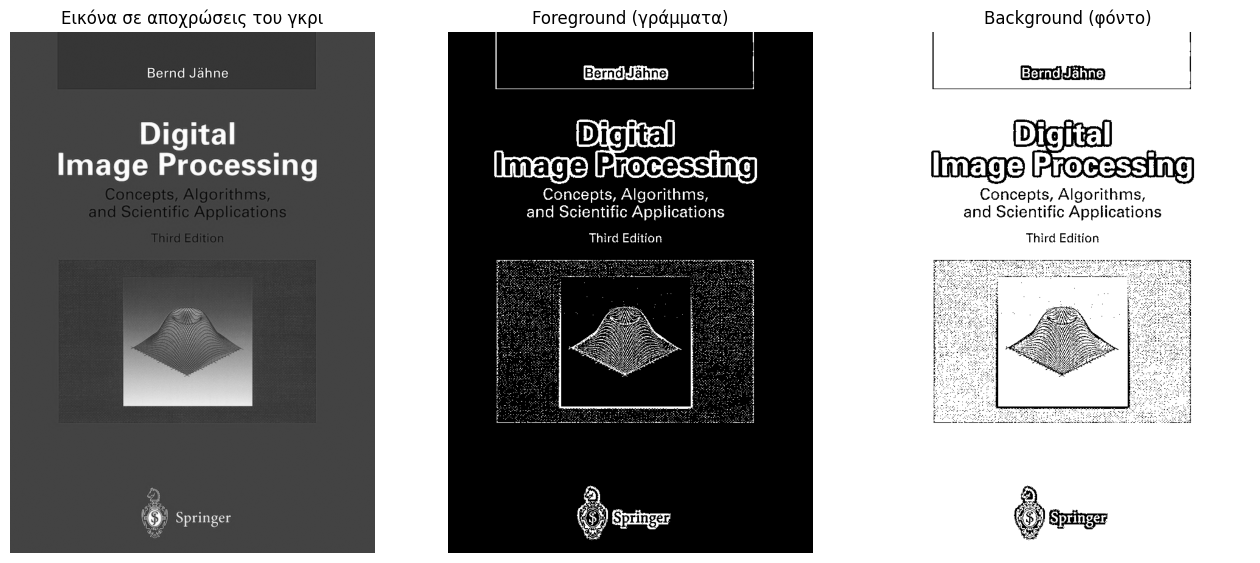

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

book_image = ski.io.imread('https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-1/instructions/images-project-1/book-cover.jpeg?raw=true')

# μετατροπή σε γκρι
gray_image = ski.color.rgb2gray(book_image)

window_size = 9
k = 0.1
# Υπολογισμός τοπικού κατωφλίου με Sauvola
sauvola = ski.filters.threshold_sauvola(gray_image, window_size=window_size, k=k)

# Δημιουργία μάσκας: foreground=γράμματα, background=φόντο
foreground_mask = gray_image < sauvola

background_mask = gray_image >= sauvola

fig, axs = plt.subplots(1, 3, figsize=(16,8))

axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title("Εικόνα σε αποχρώσεις του γκρι")
axs[0].axis('off')

axs[1].imshow(foreground_mask, cmap='gray')
axs[1].set_title("Foreground (γράμματα)")
axs[1].axis('off')

axs[2].imshow(background_mask, cmap='gray')
axs[2].set_title("Background (φόντο)")
axs[2].axis('off')

plt.show()


# Σχόλια Αποτελέσματος:

Μετέτρεψα την αρχική εικόνα του εξωφύλλου σε αποχρώσεις του γκρι, εφάρμοσα τοπικό κατώφλι με τη μέθοδο Sauvola για να διαχωρίσω τα γράμματα από το φόντο. Παρατηρώ ότι η μάσκα του foreground αναδεικνύει με ακρίβεια τα γράμματα.